## Master's Thesis - Machine Learning in Asset Pricing

### Thomas Theodor Kjølbye 

The Following script produces all output used in the paper. On my computer, the entire script takes approximately 45 minutes to run. 

In [22]:
# Load the Usual Suspects
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sb

In [6]:
os.getcwd()

'C:\\Users\\thoma\\OneDrive - Københavns Universitet\\Documents\\Økonomi - Kandidat\\6. Semester\\Speciale\\Masters-Thesis'

In [11]:
# I have refrained from saving the firm char. in my wd (repo) because I am unable to push 3 GB worth of data to the github.
data = pd.read_csv(os.path.dirname(os.getcwd()) + '\\datashare.zip') 
print("The dataset is {:1.3f} GB".format(data.memory_usage().sum()/(1024 ** 3)))

In [12]:
data.head()

,permno,DATE,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2
0,10006,19570131,82249.000,1.122846,1.260784,0.047180,9.569953,0.025742,0.046433,0.044843,...,NaN,NaN,0.013234,9.411565e-08,0.015453,0.008058,0.355638,0.460420,1.120996e-07,37.0
1,10014,19570131,3903.375,0.426734,0.182102,-0.275641,6.237836,0.072103,0.046433,-0.086957,...,NaN,NaN,0.033305,6.610609e-06,0.047619,0.033495,1.152126,1.169610,9.229146e-08,NaN
2,10022,19570131,9273.250,1.066449,1.137313,-0.025490,7.008844,0.027648,0.046433,-0.060377,...,NaN,NaN,0.016023,2.286832e-06,0.020833,0.015589,0.815777,0.679803,1.181757e-07,NaN
3,10030,19570131,54465.875,0.926038,0.857547,0.018171,9.825337,0.021700,0.046433,0.044633,...,NaN,NaN,0.015295,1.464273e-07,0.039326,0.015849,0.739302,1.333656,6.126699e-08,NaN
4,10057,19570131,40250.000,1.247748,1.556875,0.025785,7.901007,0.025506,0.046433,0.086667,...,NaN,NaN,0.005954,1.380375e-06,0.056856,0.019945,0.755510,0.410391,3.315790e+00,NaN


In [30]:
print("The dataset is {:1.3f} GB".format(data.memory_usage().sum()/(1024 ** 3)))

The dataset is 2.976 GB


 ### For my own convience I enclose a variable description from Gu, Kelly, and Xiu (2020). From the README: 

%%% This Version: April 2019. @copyright Shihao Gu, Bryan Kelly and Dacheng Xiu
%%% If you use the dataset, please cite the paper "Empirical Asset Pricing via Machine Learning" (2018) and "Autoencoder Asset Pricing Models." (2019)

Firm Characteristics Dataset Description: \
1.DATE: The end day of each month (YYYYMMDD) \
2.permno: CRSP Permanent Company Number \
3-96. 94 Lagged Firm Characteristics (Details are in the appendix of our paper) \
97.sic2: The first two digits of the Standard Industrial Classification code on DATE

Most of these characteristics are released to the public with a delay. To avoid the forward-looking bias, we assume that monthly characteristics are delayed by at most 1 month, quarterly with at least 4 months lag, and annual with at least 6 months lag. Therefore, in order to predict returns at month t + 1, we use most recent monthly characteristics at the end of month t, most recent quarterly data by end t − 4, and most recent annual data by end t − 6. In this dataset, we've already adjusted the lags. (e.g. When DATE=19570329 in our dataset, you can use the monthly RET at 195703 as the response variable.) 

Note: CRSP returns are not included. They are accessible from WRDS.

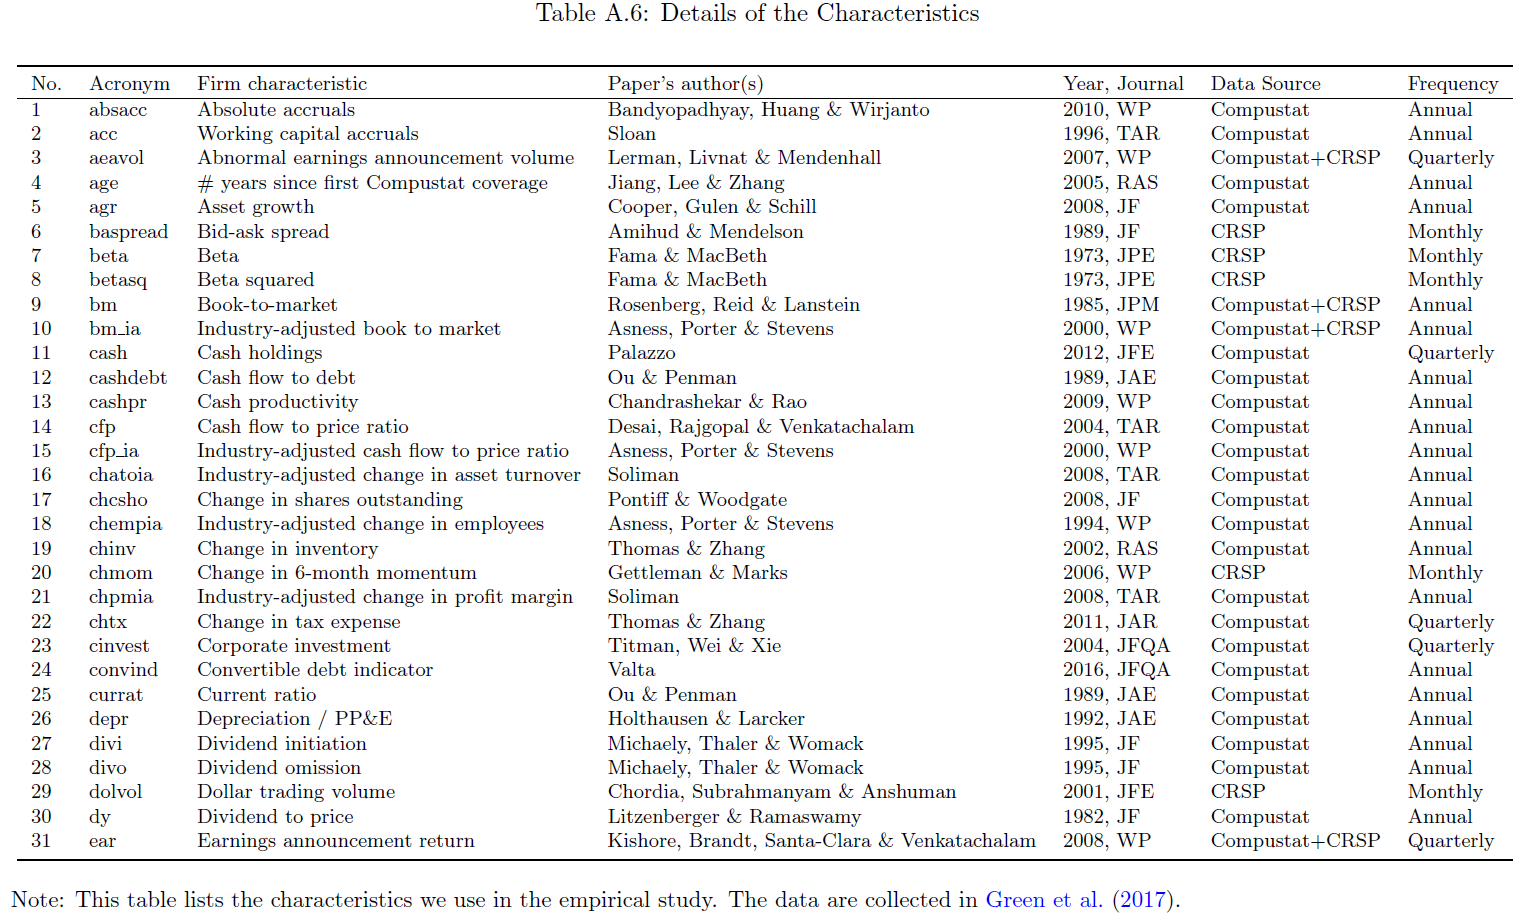

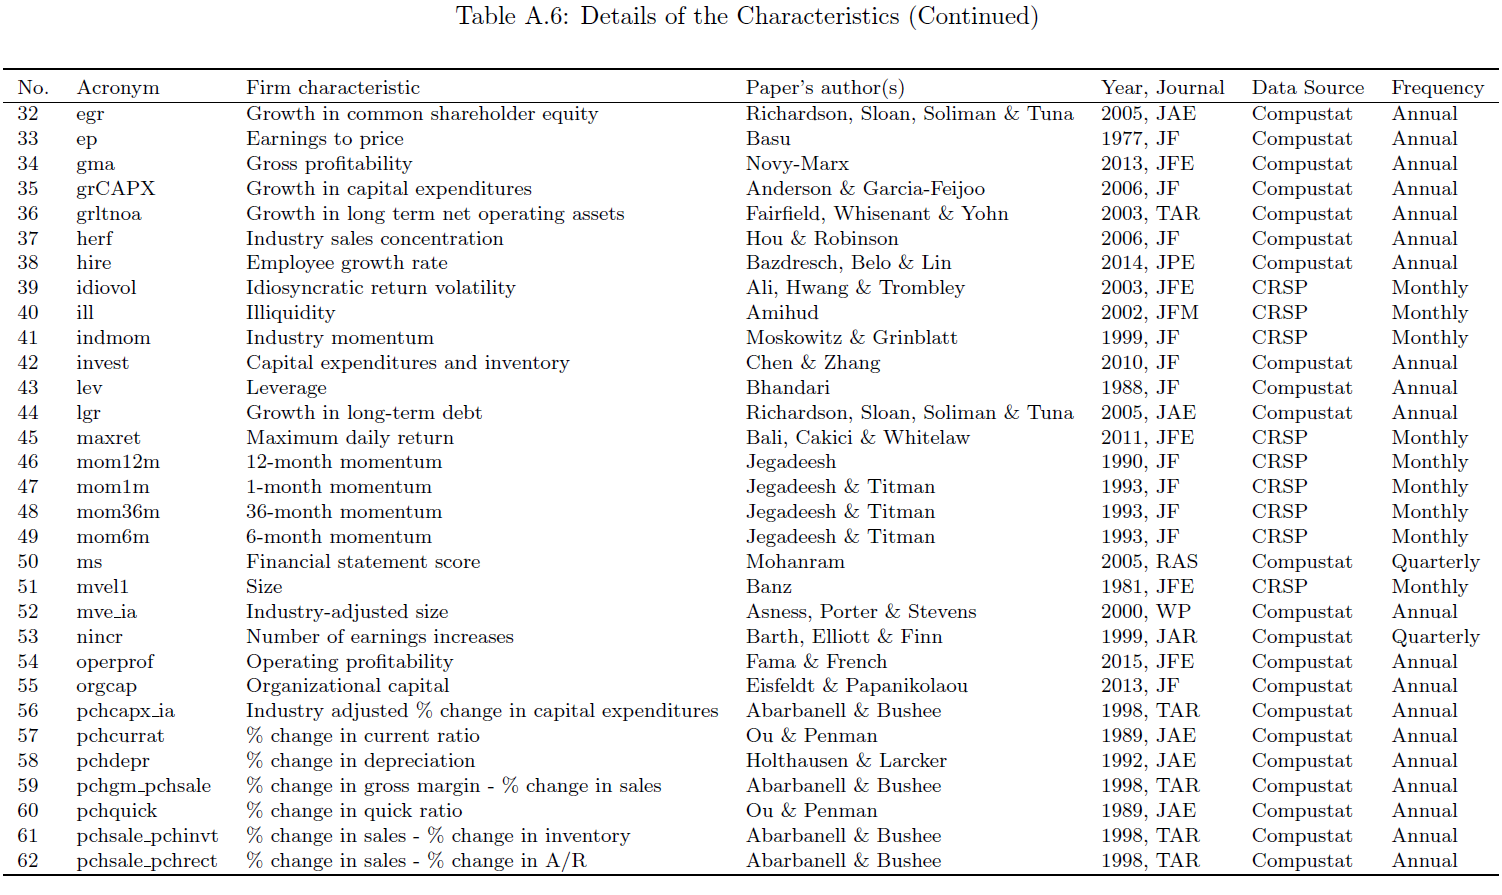